<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019/blob/master/hyperopt_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

for trial in trials.trials[:2]:
    print(trial)




100%|██████████| 1000/1000 [00:05<00:00, 177.80it/s, best loss: 2.024345827515688e-06]
best: {'x': 0.0014227950757279449}
 trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 4.640816233031515, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [2.154255377858325]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 925000), 'refresh_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 925000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.06037483153027364, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [0.24571290468812101]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 926000), 'refresh_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 926000)}


In [16]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 4.640816233031515, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [2.154255377858325]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 925000), 'refresh_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 925000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.06037483153027364, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [0.24571290468812101]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 926000), 'refresh_time': datetime.datetime(2020, 1, 24, 6, 55, 45, 926000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 3.284367705018266, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': 

Text(0, 0.5, '$x$')

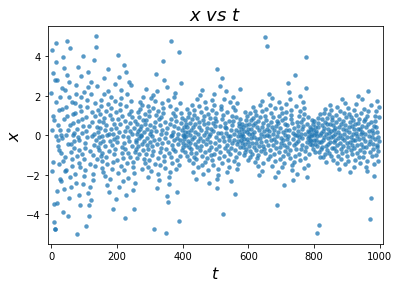

In [17]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

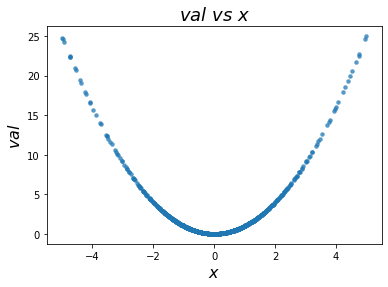

In [18]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)